In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 가져오기

In [2]:
old_people_population = pd.read_csv('data\\고령화.txt',sep ='\t', engine = 'python',encoding = 'utf-8')
silver_zone = pd.read_csv('data\\전국노인장애인보호구역표준데이터.csv',encoding = 'cp949', engine = 'python')
young_zone = pd.read_csv('data\\전국어린이보호구역표준데이터.csv', encoding = 'cp949', engine = 'python')
old_welfare = pd.read_csv('data\\노인여가복지시설.txt',sep ='\t', engine = 'python',encoding = 'utf-8')
old_nursing = pd.read_csv('data\\서울특별시 노인요양시설 정보_20180821 (1).csv', encoding='cp949', engine = 'python')
young_nursery = pd.read_csv('data\\어린이보육시설.txt',sep = '\t', engine = 'python',encoding = 'utf-8')

## 노인 인구 데이터 전처리

In [3]:
old_people_population

기간  자치구            동        전체인구     전체인구.1     전체인구.2   65세이상 인구  \
0      기간  자치구            동        전체인구       전체인구       전체인구         합계   
1      기간  자치구            동           계         남자         여자          계   
2    2019   합계           합계  10,010,983  4,877,725  5,133,258  1,485,272   
3    2019  종로구           소계     161,869     78,215     83,654     27,519   
4    2019  종로구          사직동       9,815      4,455      5,360      1,778   
5    2019  종로구          삼청동       2,997      1,439      1,558        664   
6    2019  종로구          부암동      10,551      5,045      5,506      1,762   
7    2019  종로구          평창동      18,816      8,812     10,004      3,263   
8    2019  종로구          무악동       8,740      4,078      4,662      1,413   
9    2019  종로구          교남동      10,708      4,983      5,725      1,564   
10   2019  종로구          가회동       4,488      2,084      2,404        919   
11   2019  종로구  종로1.2.3.4가동       8,446      4,885      3,561      1,900   
12   2019  종로구      종로5·6가동       5,839      3,173      2,666      1,117   
13   2019  종로구          이화동       8,470      3,896      4,574      1,377   
14   2019  종로구         창신1동       6,079      3,252      2,827      1,214   
15   2019  종로구         창신2동       9,799      4,974      4,825      1,708   
16   2019  종로구         창신3동       7,271      3,588      3,683      1,198   
17   2019  종로구         숭인1동       6,532      3,196      3,336      1,159   
18   2019  종로구         숭인2동       9,902      4,987      4,915      1,653   
19   2019  종로구        청운효자동      12,981      6,076      6,905      2,202   
20   2019  종로구          혜화동      20,435      9,292     11,143      2,628   
21   2019   중구           소계     136,488     66,823     69,665     23,275   
22   2019   중구          소공동       3,059      1,550      1,509        284   
23   2019   중구          회현동       5,850      3,170      2,680      1,470   
24   2019   중구           명동       3,567      1,573      1,994        750   
25   2019   중구           필동       5,020      2,478      2,542        820   
26   2019   중구          장충동       5,628      2,779      2,849        810   
27   2019   중구          광희동       6,284      3,299      2,985      1,172   
28   2019   중구         을지로동       2,007      1,202        805        489   
29   2019   중구         신당5동      10,929      5,339      5,590      1,690   
..    ...  ...          ...         ...        ...        ...        ...   
422  2019  송파구         가락2동      33,920     16,638     17,282      3,797   
423  2019  송파구         문정1동      21,301     10,521     10,780      2,697   
424  2019  송파구         문정2동      29,967     13,937     16,030      3,546   
425  2019  송파구          장지동      33,055     16,028     17,027      4,124   
426  2019  송파구          위례동      28,296     13,768     14,528      1,922   
427  2019  송파구         잠실본동      29,628     14,012     15,616      3,475   
428  2019  송파구         잠실4동      22,240     10,724     11,516      2,522   
429  2019  송파구         잠실6동      17,441      8,332      9,109      2,577   
430  2019  송파구         잠실7동      10,191      4,748      5,443      2,006   
431  2019  송파구         잠실2동      36,809     17,607     19,202      3,245   
432  2019  송파구         잠실3동      36,038     17,190     18,848      5,072   
433  2019  강동구           소계     440,390    217,338    223,052     63,452   
434  2019  강동구          강일동      32,127     15,534     16,593      4,527   
435  2019  강동구          상일동      10,773      5,356      5,417      1,579   
436  2019  강동구         명일1동      26,758     13,095     13,663      3,521   
437  2019  강동구         명일2동      17,778      8,790      8,988      2,255   
438  2019  강동구         고덕1동      27,079     13,754     13,325      2,652   
439  2019  강동구         고덕2동      19,345      9,889      9,456      2,372   
440  2019  강동구         암사2동      14,774      7,208      7,566      2,123   
441  2019  강동구         암사3동      18,693      9,148      9,545      2,368   
442  2019  강동구         천호1동      28,400     13,987     

In [4]:
#데이터 확인
# old_people_population.head(5)
# 데이터 정리 - 전체인구+65세이상인구 칼럼만 사용
old_people_population = old_people_population.drop([0,1,2]).reset_index()
old_people_population = old_people_population[old_people_population['동'] == '소계']
old_people_population = old_people_population[['자치구','전체인구','65세이상 인구']]

In [5]:
#str데이터 int로 바꿔주기
old_people_population['전체인구'] = old_people_population['전체인구'].str.replace(',','')
old_people_population['65세이상 인구'] = old_people_population['65세이상 인구'].str.replace(',','')
old_people_population = old_people_population.astype({'전체인구':int,'65세이상 인구':int})

In [6]:
old_people_population.dtypes

자치구         object
전체인구         int32
65세이상 인구     int32
dtype: object

In [7]:
# 노인인구 비율 칼럼 추가
old_people_population['노인비율'] = old_people_population['65세이상 인구']/old_people_population['전체인구']

### 전체인구 vs 노인인구

In [8]:
# 2019년 전체 인구
total_population_2019 = old_people_population.groupby('자치구').sum()[['전체인구','65세이상 인구']].sum()
total_population_2019

전체인구        10010983
65세이상 인구     1485272
dtype: int64

In [9]:
# 2019년 서울시 노인인구 vs 전체인구
old_people_population = old_people_population.set_index('자치구')
old_people_population

전체인구  65세이상 인구      노인비율
자치구                             
종로구   161869     27519  0.170008
중구    136488     23275  0.170528
용산구   245185     38791  0.158211
성동구   308979     43947  0.142233
광진구   366972     47902  0.130533
동대문구  363023     59350  0.163488
중랑구   402024     65164  0.162090
성북구   454744     70850  0.155802
강북구   317695     60577  0.190677
도봉구   335631     58714  0.174936
노원구   537303     80923  0.150610
은평구   484546     80738  0.166626
서대문구  323171     52074  0.161135
마포구   385925     52429  0.135853
양천구   462285     61264  0.132524
강서구   598273     84077  0.140533
구로구   439371     65779  0.149712
금천구   251820     37660  0.149551
영등포구  400986     57872  0.144324
동작구   408912     62226  0.152175
관악구   517334     75194  0.145349
서초구   435107     57136  0.131315
강남구   550209     71025  0.129087
송파구   682741     87334  0.127917
강동구   440390     63452  0.144081

In [10]:
old_people_population.sort_values(by=['노인비율'],axis=0,ascending = False)

전체인구  65세이상 인구      노인비율
자치구                             
강북구   317695     60577  0.190677
도봉구   335631     58714  0.174936
중구    136488     23275  0.170528
종로구   161869     27519  0.170008
은평구   484546     80738  0.166626
동대문구  363023     59350  0.163488
중랑구   402024     65164  0.162090
서대문구  323171     52074  0.161135
용산구   245185     38791  0.158211
성북구   454744     70850  0.155802
동작구   408912     62226  0.152175
노원구   537303     80923  0.150610
구로구   439371     65779  0.149712
금천구   251820     37660  0.149551
관악구   517334     75194  0.145349
영등포구  400986     57872  0.144324
강동구   440390     63452  0.144081
성동구   308979     43947  0.142233
강서구   598273     84077  0.140533
마포구   385925     52429  0.135853
양천구   462285     61264  0.132524
서초구   435107     57136  0.131315
광진구   366972     47902  0.130533
강남구   550209     71025  0.129087
송파구   682741     87334  0.127917

In [11]:
district_old = old_people_population['65세이상 인구']
district_old.sort_values(ascending=False)

자치구
송파구     87334
강서구     84077
노원구     80923
은평구     80738
관악구     75194
강남구     71025
성북구     70850
구로구     65779
중랑구     65164
강동구     63452
동작구     62226
양천구     61264
강북구     60577
동대문구    59350
도봉구     58714
영등포구    57872
서초구     57136
마포구     52429
서대문구    52074
광진구     47902
성동구     43947
용산구     38791
금천구     37660
종로구     27519
중구      23275
Name: 65세이상 인구, dtype: int32

## 노인보호구역, 어린이구역 데이터 전처리

In [12]:
silver_zone.head()

장소유형코드       대상시설명   시도명 시군구명  시군구코드                소재지도로명주소  \
0       1    부암1리 경로당  충청남도  금산군  44710    충청남도 금산군 진산면 뜬바우길 12   
1       1  천내1,3리 경로당  충청남도  금산군  44710    충청남도 금산군 제원면 금강로 334   
2       1    동곡1리 경로당  충청남도  금산군  44710     충청남도 금산군 제원면 동곡길 28   
3       1   태안 노인복지회관  충청남도  태안군  44825     충청남도 태안군 태안읍 후곡로 79   
4       2    장애인종합복지관  전라남도  광양시  46230  전라남도 광양시 광양읍 대림오성로 117   

                   소재지지번주소         위도          경도  제한속도     관리기관명  \
0                      NaN  36.146628  127.395492    30  충청남도 금산군   
1                      NaN  36.112153  127.570152    30  충청남도 금산군   
2                      NaN  36.136288  127.546822    30  충청남도 금산군   
3  충청남도 태안군 태안읍 남문리 712-13  36.745991  126.301671    30       태안군   
4                      NaN  34.965189  127.574359    30  전라남도 광양시   

       관리기관전화번호 관할경찰서명 CCTV설치여부  CCTV설치대수 보호구역도로폭     데이터기준일자   제공기관코드  \
0  041-750-2713  금산경찰서        N       0.0     NaN  2019-12-03  4550000   
1  041-750-2713  금산경찰서        N       0.0     NaN  2019-12-03  4550000   
2  041-750-2713  금산경찰서        N       0.0     NaN  2019-12-03  4550000   
3  041-670-2719  태안경찰서        N       NaN       3  2020-02-07  4620000   
4  061-797-2297  광양경찰서        N       0.0    7~11  2020-03-23  4840000   

      제공기관명  
0  충청남도 금산군  
1  충청남도 금산군  
2  충청남도 금산군  
3  충청남도 태안군  
4  전라남도 광양시

In [13]:
# 필요한 데이터만 가져오기 - 서울특별시
silver_zone['시도명'].unique()
silver_zone_seoul = silver_zone[silver_zone['시도명']=='서울특별시']
silver_zone_seoul.head(5)

장소유형코드      대상시설명    시도명 시군구명  시군구코드                소재지도로명주소  \
243       1  강북노인종합복지관  서울특별시  강북구  11305        서울 강북구 삼양로92길 40   
244       1     강북노인회관  서울특별시  강북구  11305        서울 강북구 삼양로 280-1   
273       1  방배노인종합복지관  서울특별시  서초구  11650       서울특별시 서초구 방배천로 48   
274       1  양재노인종합복지관  서울특별시  서초구  11650  서울특별시 서초구 강남대로30길 73-7   
275       1  중앙노인종합복지관  서울특별시  서초구  11650    서울특별시 서초구 서초대로54길 45   

                   소재지지번주소         위도          경도  제한속도      관리기관명  \
243                    NaN  37.635732  127.018736    30  서울특별시 강북구   
244                    NaN  37.628507  127.018166    50  서울특별시 강북구   
273   서울특별시 서초구 방배동 455-11  37.480706  126.982777    30    서울시 서초구   
274     서울특별시 서초구 양재동 7-44  37.483020  127.040807    30    서울시 서초구   
275  서울특별시 서초구 서초동 1666-17  37.492325  127.016812    30    서울시 서초구   

         관리기관전화번호 관할경찰서명 CCTV설치여부  CCTV설치대수 보호구역도로폭     데이터기준일자   제공기관코드  \
243   02-901-5927  강북경찰서        N       NaN    8~10  2020-06-25  3080000   
244   02-901-5927  강북경찰서        N       NaN      20  2020-06-25  3080000   
273  02-2155-7185  방배경찰서        Y       1.0       1  2020-07-03  3210000   
274  02-2155-7185  서초경찰서        Y       1.0       3  2020-07-03  3210000   
275  02-2155-7185  서초경찰서        Y       1.0       4  2020-07-03  3210000   

         제공기관명  
243  서울특별시 강북구  
244  서울특별시 강북구  
273  서울특별시 서초구  
274  서울특별시 서초구  
275  서울특별시 서초구

In [14]:
#잘못된 데이터 수정 + 칼럼 이름 수정
silver_zone_seoul['시군구명'].unique()
silver_zone_seoul['시군구명'] = silver_zone_seoul['시군구명'].str.replace('서울특별시 노원구','노원구')
silver_zone_seoul = silver_zone_seoul.rename({'시군구명':'자치구'},axis='columns')

C:\Users\Hwang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
silver_zone_seoul['자치구'].unique()

array(['강북구', '서초구', '노원구', '강서구', '종로구', '영등포구', '중랑구', '관악구', '성동구',
       '양천구', '강남구', '동작구', '구로구', '송파구', '성북구', '용산구', '동대문구', '강동구',
       '은평구', '광진구'], dtype=object)

In [16]:
young_zone.head(5)

시설종류   대상시설명               소재지도로명주소                 소재지지번주소         위도  \
0  초등학교  장천초등학교   전라남도 영암군 서호면 서호로 332    전라남도 영암군 서호면 장천리 573  34.756033   
1  초등학교  구림초등학교   전라남도 영암군 군서면 왕인로 509  전라남도 영암군 군서면 동구림리 93-1  34.763738   
2  초등학교  도포초등학교  전라남도 영암군 도포면 줄다리로 117  전라남도 영암군 도포면 덕화리 100-2  34.836549   
3  초등학교  독천초등학교    전라남도 영암군 학산면 영산로 58     전라남도 영암군 학산면 독천리 85  34.728316   
4  초등학교  학산초등학교   전라남도 영암군 학산면 금계로 193  전라남도 영암군 학산면 금계리 471-1  34.720560   

           경도 관리기관명 관할경찰서명 CCTV설치여부  CCTV설치대수 보호구역도로폭     데이터기준일자   제공기관코드  \
0  126.583025   영암군  영암경찰서        Y       4.0      16  2020-03-30  4940000   
1  126.632244   영암군  영암경찰서        Y       3.0      12  2020-03-30  4940000   
2  126.635336   영암군  영암경찰서        Y       3.0       8  2020-03-30  4940000   
3  126.564459   영암군  영암경찰서        Y       3.0      12  2020-03-30  4940000   
4  126.596789   영암군  영암경찰서        Y       3.0       8  2020-03-30  4940000   

      제공기관명  
0  전라남도 영암군  
1  전라남도 영암군  
2  전라남도 영암군  
3  전라남도 영암군  
4  전라남도 영암군

In [17]:
#서울시 데이터만 가져오기
young_zone_seoul = young_zone.loc[young_zone['소재지도로명주소'].str.contains('서울특별시',na=False)]
young_zone_seoul

시설종류       대상시설명                  소재지도로명주소                 소재지지번주소  \
136     유치원       티움유치원    서울특별시 송파구 송파대로36길 32-6   서울특별시 송파구 송파2동 180-18   
137    어린이집      예일어린이집     서울특별시 송파구 백제고분로20길 16      서울특별시 송파구 잠실본동 331   
377     유치원       보고유치원    서울특별시 노원구 석계로13길 23-14    서울특별시 노원구 월계1동 435-5   
378     유치원       영은유치원      서울특별시 노원구 동일로213길 78      서울특별시 노원구 상계6동 740   
379     유치원      아이디유치원      서울특별시 노원구 동일로221길 32     서울특별시 노원구 상계10동 695   
380     유치원       성희유치원      서울특별시 노원구 동일로215길 48    서울특별시 노원구 상계6동 737-2   
381     유치원       연세유치원         서울특별시 노원구 섬밭로 265       서울특별시 노원구 중계동 505   
382     유치원       상원유치원       서울특별시 노원구 노원로19길 31    서울특별시 노원구 중계3동 511-2   
383     유치원       성북유치원      서울특별시 노원구 광운로17길 5-3    서울특별시 노원구 월계4동 390-4   
384     유치원       연지유치원       서울특별시 노원구 월계로55길 16     서울특별시 노원구 월계동 320-9   
385     유치원       예진유치원         서울특별시 노원구 섬밭로 123      서울특별시 노원구 공릉3동 715   
386     유치원       한울유치원    서울특별시 노원구 덕릉로122길 12-6     서울특별시 노원구 상계3동 1293   
387     유치원       노일유치원      서울특별시 노원구 동일로231길 24     서울특별시 노원구 상계1동 1044   
388    초등학교        덕암초교      서울특별시 노원구 덕릉로112길 68  서울특별시 노원구 상계3동 1200-74   
389    초등학교        수암초교        서울특별시 노원구 중계로12길 9       서울특별시 노원구 중계본동 77   
390    초등학교        계상초교    서울특별시 노원구 한글비석로41가길 24    서울특별시 노원구 상계5동 447-1   
391    초등학교        청원초교       서울특별시 노원구 한글비석로 506      서울특별시 노원구 상계9동 641   
392    초등학교        상곡초교       서울특별시 노원구 노원로38길 34     서울특별시 노원구 상계10동 678   
393    초등학교        온곡초교     서울특별시 노원구 한글비석로52길 59      서울특별시 노원구 상계9동 638   
394    초등학교        수락초교        서울특별시 노원구 동일로 1745   서울특별시 노원구 상계1동 1171-2   
395    초등학교        상천초교         서울특별시 노원구 덕릉로 443      서울특별시 노원구 상계6동 768   
396    초등학교        당현초교      서울특별시 노원구 동일로213길 52      서울특별시 노원구 상계6동 742   
397    초등학교        상명초교         서울특별시 노원구 덕릉로 541    서울특별시 노원구 중계3동 515-1   
398    초등학교        청계초교         서울특별시 노원구 공릉로 431    서울특별시 노원구 중계3동 513-1   
399    초등학교        연지초교       서울특별시 노원구 월계로55길 48       서울특별시 노원구 월계동 271   
400    초등학교        용원초교         서울특별시 노원구 섬밭로 144      서울특별시 노원구 공릉3동 709   
401    초등학교        중평초교         서울특별시 노원구 섬밭로 241       서울특별시 노원구 하계동 271   
402    초등학교        태랑초교      서울특별시 노원구 화랑로51나길 31      서울특별시 노원구 공릉2동 116   
403    초등학교        태강삼육         서울특별시 노원구 화랑로 815    서울특별시 노원구 공릉2동 26-39   
404    초등학교        화랑초교       서울특별시 노원구 화랑로53길 22      서울특별시 노원구 공릉2동 126   
...     ...         ...                       ...                     ...   
16931  어린이집  구립신길5동어린이집      서울특별시 영등포구 신길로13길 20   서울특별시 영등포구 신길동 440-53   
16933   유치원       계상유치원     서울특별시 양천구 남부순환로86길 22   서울특별시 양천구 신정3동 1286-1   
16934  어린이집      성심어린이집        서울특별시 중구 동호로15길 50     서울특별시 중구 신당동 432-24   
16935  어린이집      청구어린이집        서울특별시 중구 다산로24길 81    서울특별시 중구 신당동 333-177   
16936  어린이집    신당5동어린이집     서울특별시 중구 퇴계로88가길 8-10      서울특별시 중구 신당동 67-12   
16937  어린이집    동화나라어린이집        서울특별시 중구 다산로38길 80     서울특별시 중구 신당동 52-154   
16938  어린이집    서울직장어린이집       서울특별시 중구 서소문로11길 24        서울특별시 중구 서소문동 37   
16939  어린이집      황학어린이집        서울특별시 중구 난계로15길 23       서울특별시 중구 황학동 1457   
16940  어린이집      약수어린이집         서울특별시 중구 다산로6길 15     서울특별시 중구 신당동 366-19   
16941  어린이집    약수교회어린이집         서울특별시 중구 다산로8길 32     서울특별시 중구 신당동 372-87   
16942  어린이집      한솔어린이집           서울특별시 중구 다산로 32    서울특별시 중구 신당동 372-468   
16943  어린이집     남산숲어린이집        서울특별시 중구 동호로5길 193    서울특별시 중구 신당동 366-480   
16944   유치원       가명유치원           서울특별시 중구 중림로 27      서울특별시 중구 중림동 149-2   
16945   유치원       근화유치원        서울특별시 중구 동호로20길 24      서울특별시 중구 신당동 406-4   
16946   유치원       수암유치원           서울특별시 중구 다산로 32      서울특별시 중구 신당동 844-1   
16947   유치원       신일유치원        서울특별시 중구 동호로10길 27    서울특별시 중구 신당동 347-298   
16948   유치원       약수유치원        서울특별시 중구 동호로10길 30        서울특별시 중구 신당동 842   
16949   유치원       한일유치원       서울특별시 중구 퇴계로88다길 19      서울특별시 중구 신당동 67-81   
16950  어린이집     단우물어린이집       서울특별시 중구 다산로 48길 36        서울특별시 중구 황학동 754   
16951  어린이집      필동어린이집      서울특별시 중구 퇴계로 36가길 60     서울특별시 중구 필동2가 116-1   
169

In [18]:
#자치구 칼럼 생성
young_zone_seoul['자치구'] = young_zone_seoul['소재지도로명주소'].str.split(" ").str[1]


C:\Users\Hwang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# 잘못된 데이터 수정
young_zone_seoul['자치구'] = young_zone_seoul['자치구'].str.replace('덕릉로62길','도봉구')

C:\Users\Hwang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
young_zone_seoul[young_zone_seoul['자치구']=='마포구']

Empty DataFrame
Columns: [시설종류, 대상시설명, 소재지도로명주소, 소재지지번주소, 위도, 경도, 관리기관명, 관할경찰서명, CCTV설치여부, CCTV설치대수, 보호구역도로폭, 데이터기준일자, 제공기관코드, 제공기관명, 자치구]
Index: []

In [21]:
silver_seoul_dist= silver_zone_seoul.groupby('자치구').size()
young_seoul_dist= young_zone_seoul.groupby('자치구').size()

In [22]:
seoul_zone_dist = pd.concat([silver_seoul_dist,young_seoul_dist], axis=1, keys = ['노인','어린이'])

C:\Users\Hwang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [23]:
# NaN갑 처리
seoul_zone_dist = seoul_zone_dist.fillna(0)

In [24]:
# 자치구별 노인보호구역 vs 어린이 보호구역
seoul_zone_dist = seoul_zone_dist.astype({'노인':int,'어린이':int})

In [25]:
#마포구 추가
seoul_zone_dist.loc['마포구'] = [0,0]

### 노인 vs 어린이

In [26]:
seoul_zone_dist

노인  어린이
강남구   13  101
강동구    8   89
강북구    2   40
강서구   15   76
관악구    8   66
광진구    4   80
구로구    2   66
금천구    0   45
노원구    6  106
도봉구    0   69
동대문구   6   72
동작구    7    0
서대문구   0   40
서초구    9   59
성동구    4   51
성북구    6  105
송파구    8   90
양천구    7  100
영등포구   4   66
용산구    5    2
은평구    9   76
종로구    6   38
중구     0   33
중랑구    3   42
마포구    0    0

In [27]:
seoul_zone_dist.to_csv('data\\seoul_protection_facility.csv')

In [28]:
len(seoul_zone_dist.index)

25

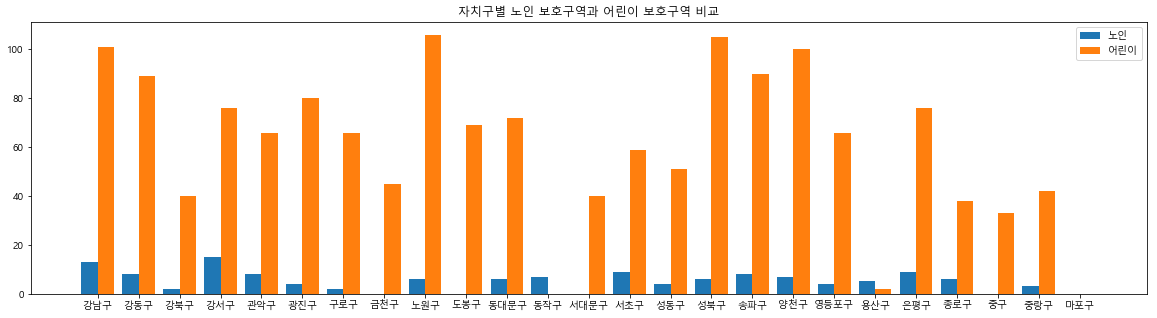

In [54]:
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.figure(figsize=[20,5])
barWidth = 0.4
plt.bar(np.arange(len(seoul_zone_dist.index)), seoul_zone_dist['노인'], align = 'edge', width = barWidth)
plt.bar(np.arange(len(seoul_zone_dist.index))+barWidth, seoul_zone_dist['어린이'], align = 'edge', width=barWidth)
plt.xticks(np.arange(len(seoul_zone_dist.index))+barWidth,seoul_zone_dist.index)
plt.title('자치구별 노인 보호구역과 어린이 보호구역 비교')
plt.legend(['노인','어린이'])
plt.savefig('img\\difference_protection_facility_old_and_young.png')
plt.show()


## 노인인구비율 vs 노인보호구역

In [30]:
populationVszone = pd.concat([old_people_population['노인비율'], seoul_zone_dist['노인']],axis=1).fillna(0)

C:\Users\Hwang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [31]:
populationVszone = populationVszone.astype({'노인':int})

In [32]:
populationVszone

노인비율  노인
강남구   0.129087  13
강동구   0.144081   8
강북구   0.190677   2
강서구   0.140533  15
관악구   0.145349   8
광진구   0.130533   4
구로구   0.149712   2
금천구   0.149551   0
노원구   0.150610   6
도봉구   0.174936   0
동대문구  0.163488   6
동작구   0.152175   7
마포구   0.135853   0
서대문구  0.161135   0
서초구   0.131315   9
성동구   0.142233   4
성북구   0.155802   6
송파구   0.127917   8
양천구   0.132524   7
영등포구  0.144324   4
용산구   0.158211   5
은평구   0.166626   9
종로구   0.170008   6
중구    0.170528   0
중랑구   0.162090   3

## 노인요양시설/여가시설 데이터 전처리


In [33]:
# 여가시설
old_welfare.head()

기간  자치구   시설합계 노인복지관 노인복지관.1    경로당  노인교실
0    기간  자치구   시설합계   시설수    종사자수    경로당  노인교실
1  2019   합계  3,942    85   2,104  3,466   391
2  2019  종로구     76     3     107     63    10
3  2019   중구     53     2      62     47     4
4  2019  용산구    111     2      42     88    21

In [34]:
old_welfare = old_welfare.drop([0,1])
old_welfare_seoul = old_welfare[['자치구','시설합계']]

In [35]:
old_welfare_seoul= old_welfare_seoul.set_index('자치구')
old_welfare_seoul = old_welfare_seoul.rename({'시설합계':'복지시설'},axis='columns')
old_welfare_seoul.head()

복지시설
자치구     
종로구   76
중구    53
용산구  111
성동구  179
광진구  108

In [36]:
old_welfare_seoul.shape

(25, 1)

In [37]:
# 요양시설
old_nursing.head()

번호       사업장명                   소재지전체주소  도로명전체주소      개업일자 영업상태명  폐업일자  \
0   1   하늘정원실버케어  서울특별시 서대문구 홍제동 361-57번지       NaN  20091130   운영중   NaN   
1   2      삼성요양원            서울특별시 관악구 신림동       NaN  20160127   운영중   NaN   
2   3   사랑가득 요양원       서울특별시 금천구 독산동 영재빌딩       NaN  20161101   운영중   NaN   
3   4      상계요양원            서울특별시 노원구 상계동       NaN  20170613   운영중   NaN   
4   5  A+도봉재활요양원            서울특별시 도봉구 방학동       NaN  20150521   운영중   NaN   

   휴업시작일자  휴업종료일자  재개업일자  소재지면적  소재지우편번호  입소정원  자격소유인원수  총인원수        위치정보(X)  \
0     NaN     NaN    NaN    NaN      NaN  18.0      9.0  13.0  194303.954462   
1     NaN     NaN    NaN    NaN      NaN  13.0      4.0   5.0            NaN   
2     NaN     NaN    NaN    NaN      NaN  43.0      NaN  21.0            NaN   
3     NaN     NaN    NaN    NaN      NaN  82.0      NaN  48.0            NaN   
4     NaN     NaN    NaN    NaN      NaN  41.0     21.0   3.0            NaN   

         위치정보(Y) 상세영업상태명  
0  453593.870967      운영  
1            NaN      운영  
2            NaN      운영  
3            NaN      운영  
4            NaN      운영

In [38]:
# 자치구 칼럼 생성하기
old_nursing['자치구'] = old_nursing['소재지전체주소'].str.split(" ").str[1]

In [39]:
# 데이터 확인
old_nursing['자치구'].unique()

array(['서대문구', '관악구', '금천구', '노원구', '도봉구', '종로구', '중랑구', '성북구', '강동구',
       '강서구', '구로구', '은평구', '양천구', '동작구', '송파구', '강북구', '마포구', '부천시',
       '광진구', '서초구', '용인시', '수원시', '용산구', '파주시', '성동구', '군포시', '영등포구',
       '시흥시', '고양시', '강화군', '천안시', '강남구', '춘천시', '동대문구', '중구'],
      dtype=object)

In [40]:
old_nursing_seoul = old_nursing[old_nursing['자치구'].str.contains('구')]

In [41]:
old_nursing_seoul['자치구'].unique()

array(['서대문구', '관악구', '금천구', '노원구', '도봉구', '종로구', '중랑구', '성북구', '강동구',
       '강서구', '구로구', '은평구', '양천구', '동작구', '송파구', '강북구', '마포구', '광진구',
       '서초구', '용산구', '성동구', '영등포구', '강남구', '동대문구', '중구'], dtype=object)

In [42]:
old_nursing_seoul.groupby('자치구').size().sort_values(ascending = False)

자치구
도봉구     33
금천구     30
은평구     27
강서구     26
양천구     22
광진구     22
성북구     21
서대문구    21
노원구     18
강북구     16
구로구     15
강동구     14
관악구     14
서초구     12
강남구     11
종로구     11
중랑구     10
동대문구    10
송파구     10
성동구      8
동작구      7
중구       6
영등포구     5
용산구      5
마포구      4
dtype: int64

In [43]:
old_people_population['노인비율'].sort_values(ascending = False)

자치구
강북구     0.190677
도봉구     0.174936
중구      0.170528
종로구     0.170008
은평구     0.166626
동대문구    0.163488
중랑구     0.162090
서대문구    0.161135
용산구     0.158211
성북구     0.155802
동작구     0.152175
노원구     0.150610
구로구     0.149712
금천구     0.149551
관악구     0.145349
영등포구    0.144324
강동구     0.144081
성동구     0.142233
강서구     0.140533
마포구     0.135853
양천구     0.132524
서초구     0.131315
광진구     0.130533
강남구     0.129087
송파구     0.127917
Name: 노인비율, dtype: float64

In [44]:
old_welfare_seoul = old_welfare_seoul.astype({'복지시설':int})

In [45]:
old_welfare_seoul

복지시설
자치구       
종로구     76
중구      53
용산구    111
성동구    179
광진구    108
동대문구   152
중랑구    142
성북구    190
강북구    117
도봉구    149
노원구    264
은평구    180
서대문구   126
마포구    173
양천구    197
강서구    251
구로구    219
금천구     85
영등포구   205
동작구    156
관악구    134
서초구    152
강남구    195
송파구    190
강동구    138

In [46]:
old_welfare_seoul_sorted = old_welfare_seoul.sort_values('복지시설',ascending = False)

- 노원구가 제일 많았고 중구가 제일 적었다. 

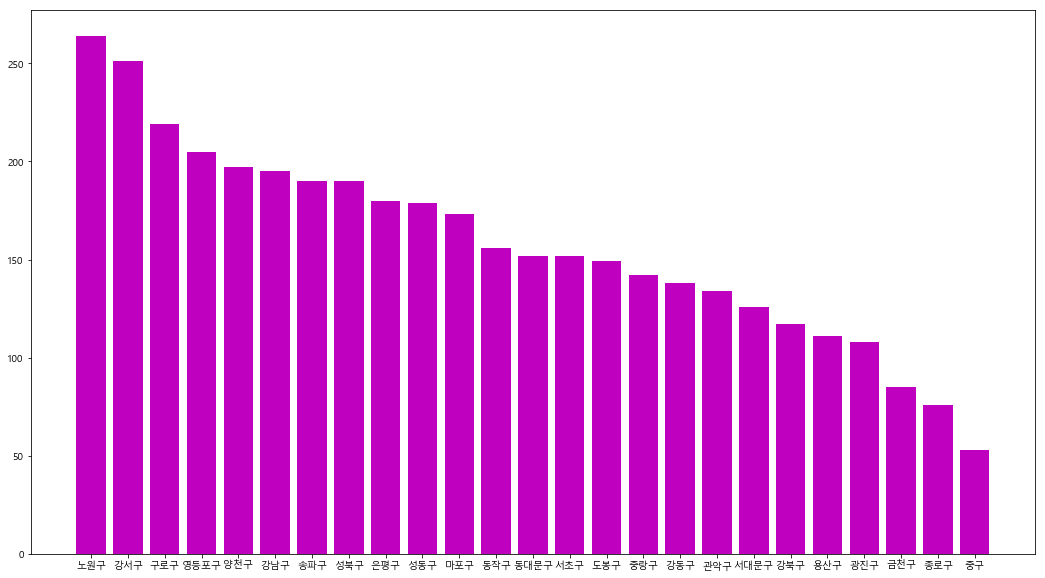

In [47]:
plt.figure(figsize=(18,10))
plt.bar(list(old_welfare_seoul_sorted.index.values),list(list(old_welfare_seoul_sorted['복지시설'])), color = 'm')
plt.show()

# 어린이 보육시설 -> 시설이 몇개 있는지 X

In [48]:
young_nursery.head()

기간  자치구 보육시설 정원 현황 보육시설 정원 현황.1 보육시설 정원 현황.2 보육시설 정원 현황.3 보육시설 정원 현황.4  \
0    기간  자치구          계          국공립       사회복지법인      법인·단체 등           민간   
1  2019  서울시    254,538       96,595        1,890        5,878       91,892   
2  2019  종로구      4,881        2,316          100          149          370   
3  2019   중구      4,459        2,033            -          378          344   
4  2019  용산구      5,221        1,970           89          335        1,136   

  보육시설 정원 현황.5 보육시설 정원 현황.6 보육시설 정원 현황.7 보육시설 현원 현황 보육시설 현원 현황.1 보육시설 현원 현황.2  \
0           가정         부모협동           직장          계          국공립       사회복지법인   
1       38,168        1,042       19,073    217,444       85,465        1,580   
2           70            -        1,876      3,581        1,747           46   
3          205            -        1,499      3,512        1,692            -   
4          904           33          754      4,610        1,776           77   

  보육시설 현원 현황.3 보육시설 현원 현황.4 보육시설 현원 현황.5 보육시설 현원 현황.6 보육시설 현원 현황.7  
0      법인·단체 등           민간           가정         부모협동           직장  
1        4,872       77,121       33,223          850       14,333  
2           90          294           51            -        1,353  
3          310          271          198            -        1,041  
4          293        1,013          813           30          608

In [49]:
young_nursery_seoul = young_nursery.drop([0,1])

In [50]:
young_nursery_seoul = young_nursery_seoul[['자치구', '보육시설 정원 현황']]

In [51]:
young_nursery_seoul['자치구'].unique().shape

(25,)

In [52]:
young_nursery_seoul.groupby('자치구').size()

자치구
강남구     1
강동구     1
강북구     1
강서구     1
관악구     1
광진구     1
구로구     1
금천구     1
노원구     1
도봉구     1
동대문구    1
동작구     1
마포구     1
서대문구    1
서초구     1
성동구     1
성북구     1
송파구     1
양천구     1
영등포구    1
용산구     1
은평구     1
종로구     1
중구      1
중랑구     1
dtype: int64